In [1]:
def print_state(state):
  print('+---+---+---+')
  for i in range(3):
    for j in range(3):
      if state[i][j] == '': print('|   ', end='')
      else: print(f'| {state[i][j]} ', end='')
    print('|')
    print('+---+---+---+')
  print('\n')

In [2]:
class Node:
  action = None

  def __init__(self, state,  parent=None):
    self.state = state
    self.parent = parent

In [3]:
class Agent:
  def __init__(self):
    self.explored_nodes = 0
    self.explored_nodes_alpha_beta = 0

  def play(self, initial_state, alpha_beta=True):
    new_node = Node(initial_state)
    if alpha_beta:
      return self.MINMAX_alpha_beta(new_node, True, float('-inf'), float('inf'))
    else:
      return self.MINMAX(new_node, True)


  def isGameEnd(self, state):
    for i in range(3):
      if state[i][0] == state[i][1] == state[i][2] == 'X':
          return True
      if state[0][i] == state[1][i] == state[2][i] == 'X':
          return True
      if state[i][0] == state[i][1] == state[i][2] == 'O':
          return True
      if state[0][i] == state[1][i] == state[2][i] == 'O':
          return True
    if state[0][0] == state[1][1] == state[2][2] == 'X' or state[0][2] == state[1][1] == state[2][0] == 'X':
      return True
    if state[0][0] == state[1][1] == state[2][2] == 'O' or state[0][2] == state[1][1] == state[2][0] == 'O':
      return True

    for i in range(3):
      for j in range(3):
        if state[i][j] == '': return False

    return True


  def evaluate(self, state):
    for i in range(3):
      if state[i][0] == state[i][1] == state[i][2] == 'X':
          return 1
      if state[0][i] == state[1][i] == state[2][i] == 'X':
          return 1
      if state[i][0] == state[i][1] == state[i][2] == 'O':
          return -1
      if state[0][i] == state[1][i] == state[2][i] == 'O':
          return -1
    if state[0][0] == state[1][1] == state[2][2] == 'X' or state[0][2] == state[1][1] == state[2][0] == 'X':
      return 1
    if state[0][0] == state[1][1] == state[2][2] == 'O' or state[0][2] == state[1][1] == state[2][0] == 'O':
      return -1

    return 0


  def get_next_states(self, state, player1Turn):
    next_states = []
    for i in range(3):
      for j in range(3):
        if state[i][j] == 'X' or state[i][j] == 'O': continue
        next_state = [row[:] for row in state]
        if player1Turn: next_state[i][j] = 'X'
        else: next_state[i][j] = 'O'

        next_states.append(next_state)
    return next_states


  def MINMAX(self, curr_node, player1Turn):
    self.explored_nodes += 1
    if self.isGameEnd(curr_node.state):
      return [self.evaluate(curr_node.state), []]

    if player1Turn:
      maxValue = float('-inf')
      action_node_path = []

      for next_state in self.get_next_states(curr_node.state, True):
        new_node = Node(next_state, curr_node)
        eval = self.MINMAX(new_node, False)

        if eval[0] > maxValue:
          maxValue = eval[0]
          action_node_path = [node for node in eval[1]]
          action_node_path.append(new_node)

      return [maxValue, action_node_path]
    else:
      minValue = float('inf')
      action_node_path = []

      for next_state in self.get_next_states(curr_node.state, False):
        new_node = Node(next_state, curr_node)
        eval = self.MINMAX(new_node, True)

        if eval[0] < minValue:
          minValue = eval[0]
          action_node_path = [node for node in eval[1]]
          action_node_path.append(new_node)

      return [minValue, action_node_path]


  def MINMAX_alpha_beta(self, curr_node, player1Turn, alpha, beta):
    self.explored_nodes_alpha_beta += 1
    if self.isGameEnd(curr_node.state):
      return [self.evaluate(curr_node.state), []]

    if player1Turn:
      maxValue = float('-inf')
      action_node_path = []

      for next_state in self.get_next_states(curr_node.state, True):
        new_node = Node(next_state, curr_node)
        eval = self.MINMAX_alpha_beta(new_node, False, alpha, beta)

        if eval[0] > maxValue:
          maxValue = eval[0]
          action_node_path = [node for node in eval[1]]
          action_node_path.append(new_node)

        alpha = max(eval[0], alpha)
        if beta <= alpha: break

      return [maxValue, action_node_path]
    else:
      minValue = float('inf')
      action_node_path = []

      for next_state in self.get_next_states(curr_node.state, False):
        new_node = Node(next_state, curr_node)
        eval = self.MINMAX_alpha_beta(new_node, True, alpha, beta)

        if eval[0] < minValue:
          minValue = eval[0]
          action_node_path = [node for node in eval[1]]
          action_node_path.append(new_node)

        beta = min(beta, eval[0])
        if beta <= alpha: break

      return [minValue, action_node_path]

In [4]:
initial_state = [
    ['', '', ''],
    ['', '', ''],
    ['', '', '']
]

agent = Agent()

best_possible_outcome = agent.play(initial_state, alpha_beta=False)
print(f'Best possible outcome minimax {best_possible_outcome[0]}')
print(f'Number of nodes explored : {agent.explored_nodes}')

best_possible_outcome_alpha_beta = agent.play(initial_state, alpha_beta=True)
print(f'Best possible outcome by alpha-beta {best_possible_outcome_alpha_beta[0]}')
print(f'Number of nodes explored : {agent.explored_nodes_alpha_beta}')

best_possible_outcome[1].reverse()

Best possible outcome minimax 0
Number of nodes explored : 549946
Best possible outcome by alpha-beta 0
Number of nodes explored : 18297


In [5]:
from IPython.display import display, clear_output
from PIL import Image, ImageDraw, ImageFont

class TicTacToeColab:
    def __init__(self, state):
        self.state = state
        self.board_size = 300
        self.line_width = 5
        self.cell_size = self.board_size // 3
        self.images = []

    def draw_board(self, title=""):
        img = Image.new('RGB', (self.board_size, self.board_size), 'white')
        draw = ImageDraw.Draw(img)

        font_size = 16
        title_font = ImageFont.load_default()
        title_position = (self.board_size // 2, 10)
        draw.text(title_position, title, fill='black', font=title_font, anchor='mt')

        for i in range(1, 3):
            x = i * self.cell_size
            draw.line([(x, 0), (x, self.board_size)], fill='black', width=self.line_width)
            draw.line([(0, x), (self.board_size, x)], fill='black', width=self.line_width)

        font_size = 40
        font = ImageFont.load_default()

        for i in range(3):
            for j in range(3):
                x, y = j * self.cell_size + self.cell_size // 2, i * self.cell_size + self.cell_size // 2
                symbol = self.state[i][j]

                if symbol == 'X':
                    draw.line([(x - 30, y - 30), (x + 30, y + 30)], fill='black', width=self.line_width)
                    draw.line([(x - 30, y + 30), (x + 30, y - 30)], fill='black', width=self.line_width)
                elif symbol == 'O':
                    draw.ellipse([(x - 30, y - 30), (x + 30, y + 30)], outline='black', width=self.line_width)

        self.images.append((img, title))

Best possible Outcome Path : 

Move 1


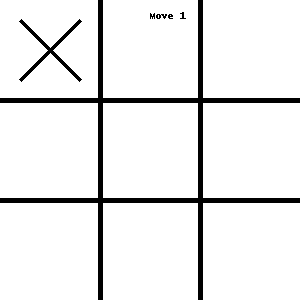


Move 2


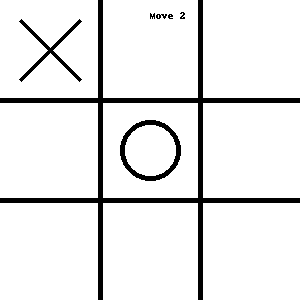


Move 3


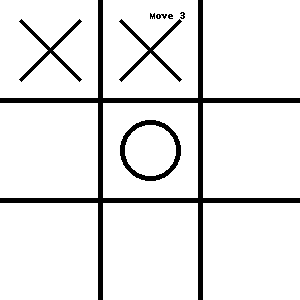


Move 4


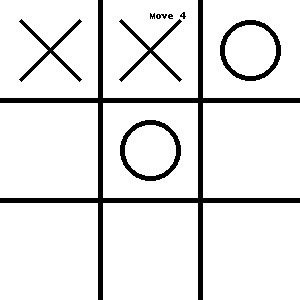


Move 5


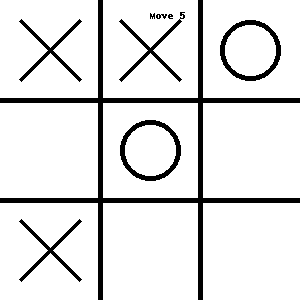


Move 6


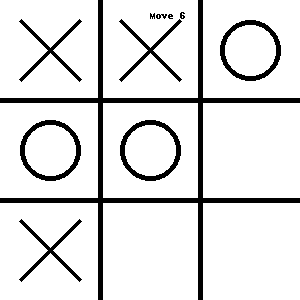


Move 7


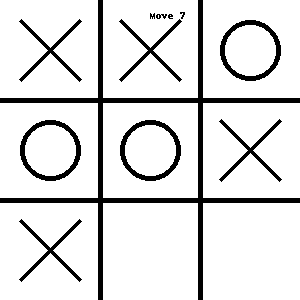


Move 8


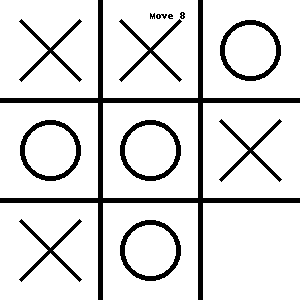


Move 9


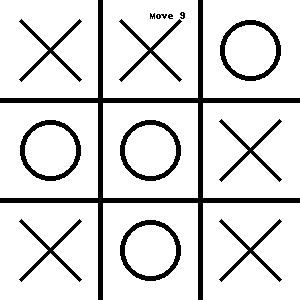

In [ ]:
tic_tac_toe = TicTacToeColab(initial_state)

for idx, node in enumerate(best_possible_outcome[1]):
  tic_tac_toe.state = node.state
  title = f"Move {idx + 1}"
  tic_tac_toe.draw_board(title)


print('Best possible Outcome Path : \n')
for img, title in tic_tac_toe.images:
 print(title)
 display(img)
 print()

In [ ]:
import math

class GameState:
    def __init__(self, board):
        self.board = board

    def utility(self):
        # Check rows, columns, and diagonals for win/lose/draw
        for row in self.board:
            if row.count(1) == 3:
                return 1
            elif row.count(2) == 3:
                return -1

        for col in range(3):
            if self.board[0][col] == self.board[1][col] == self.board[2][col] == 1:
                return 1
            elif self.board[0][col] == self.board[1][col] == self.board[2][col] == 2:
                return -1

        if self.board[0][0] == self.board[1][1] == self.board[2][2] == 1:
            return 1
        elif self.board[0][0] == self.board[1][1] == self.board[2][2] == 2:
            return -1

        if self.board[0][2] == self.board[1][1] == self.board[2][0] == 1:
            return 1
        elif self.board[0][2] == self.board[1][1] == self.board[2][0] == 2:
            return -1

        # Check for draw
        if all(cell != 0 for row in self.board for cell in row):
            return 0

        # Game is ongoing
        return None

    def actions(self):
        possible_actions = []
        for i in range(3):
            for j in range(3):
                if self.board[i][j] == 0:
                    possible_actions.append((i, j))
        return possible_actions

    def result(self, action):
        row, col = action
        player = 1  # Assuming it's player 1's turn
        new_board = [row[:] for row in self.board]
        new_board[row][col] = player
        return GameState(new_board)

# MINIMAX algorithm with alpha-beta pruning
def minimax_ab_pruning(state, depth, alpha, beta, maximizing_player):
    if depth == 0 or state.utility() is not None:
        return state.utility()

    if maximizing_player:
        max_eval = -math.inf
        for action in state.actions():
            new_state = state.result(action)
            eval = minimax_ab_pruning(new_state, depth - 1, alpha, beta, False)
            max_eval = max(max_eval, eval)
            alpha = max(alpha, eval)
            if beta <= alpha:
                break
        return max_eval
    else:
        min_eval = math.inf
        for action in state.actions():
            new_state = state.result(action)
            eval = minimax_ab_pruning(new_state, depth - 1, alpha, beta, True)
            min_eval = min(min_eval, eval)
            beta = min(beta, eval)
            if beta <= alpha:
                break
        return min_eval

# Driver code
def main():
    initial_state = GameState([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
    depth = 9  # Maximum depth for Tic-Tac-Toe is 9
    alpha = -math.inf
    beta = math.inf
    maximizing_player = True
    num_evaluated_nodes = minimax_ab_pruning(initial_state, depth, alpha, beta, maximizing_player)
    print("Number of evaluated nodes:", num_evaluated_nodes)

if __name__ == "__main__":
    main()


Number of evaluated nodes: 1
